Descriptive Statistics:
count      1000.000000
mean      49094.865850
std       19750.540914
min      -10922.861096
25%       36031.598813
50%       48839.439304
75%       62139.012038
max      105187.102280
Name: Net Income, dtype: float64


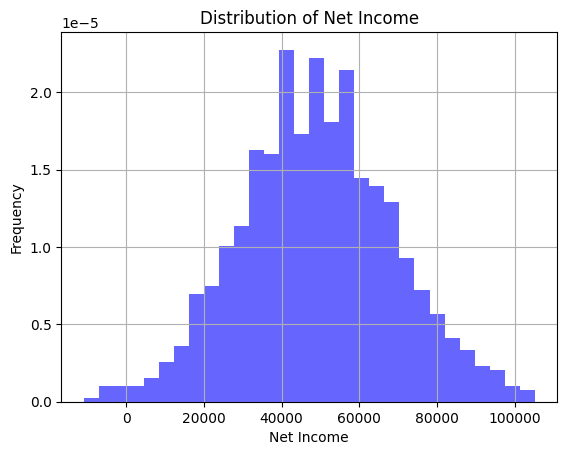

99% Historical VaR: 2715.44
99% Parametric VaR: 3148.24
Economic Capital (3 x 99% Historical VaR): 8146.32
Skewness: 0.03
Kurtosis: -0.04

--- Summary ---
99% Historical VaR: 2715.44
Economic Capital (3 x 99% Historical VaR): 8146.32
Skewness: 0.03
Kurtosis: -0.04


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

import numpy as np
import pandas as pd
import scipy.stats as st

# Generate sample net income data (replace with your actual data)
np.random.seed(0)  # for reproducibility
net_income = pd.Series(np.random.normal(loc=50000, scale=20000, size=1000), name="Net Income")

# Or, load data from a CSV file
# net_income = pd.read_csv("net_income_data.csv")["Net Income"]

# Descriptive statistics
print("Descriptive Statistics:")
print(net_income.describe())

# Visualize the distribution (optional - requires matplotlib)
import matplotlib.pyplot as plt
net_income.hist(bins=30, density=True, alpha=0.6, color='b')
plt.title("Distribution of Net Income")
plt.xlabel("Net Income")
plt.ylabel("Frequency")
plt.show()

def calculate_var(data, confidence_level=0.99, method='historical'):
    """
    Calculates Value at Risk (VaR) for a given dataset.

    Parameters:
    data (pd.Series): A Pandas Series containing the data.
    confidence_level (float): The confidence level (e.g., 0.99 for 99% VaR).
    method (str): The method for calculating VaR ('historical' or 'parametric').

    Returns:
    float: The VaR value.
    """
    if method == 'historical':
        var = data.quantile(1 - confidence_level)
    elif method == 'parametric':
        mean = data.mean()
        std = data.std()
        alpha = st.norm.ppf(1 - confidence_level)
        var = mean + alpha * std
    else:
        raise ValueError("Invalid method. Choose 'historical' or 'parametric'.")
    return var

# Calculate VaR
var_99_historical = calculate_var(net_income, confidence_level=0.99, method='historical')
var_99_parametric = calculate_var(net_income, confidence_level=0.99, method='parametric')

print(f"99% Historical VaR: {var_99_historical:.2f}")
print(f"99% Parametric VaR: {var_99_parametric:.2f}")

def estimate_economic_capital(var, multiplier=3):
    """
    Estimates Economic Capital based on VaR.

    Parameters:
    var (float): The Value at Risk.
    multiplier (float): A multiplier to apply to the VaR (e.g., 3x VaR).

    Returns:
    float: The Economic Capital.
    """
    ec = var * multiplier
    return ec

# Estimate Economic Capital
economic_capital_99 = estimate_economic_capital(var_99_historical, multiplier=3)
print(f"Economic Capital (3 x 99% Historical VaR): {economic_capital_99:.2f}")

# Calculate skewness and kurtosis
skewness = net_income.skew()
kurtosis = net_income.kurtosis()

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

print("\n--- Summary ---")
print(f"99% Historical VaR: {var_99_historical:.2f}")
print(f"Economic Capital (3 x 99% Historical VaR): {economic_capital_99:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")